- 新闻内容自动提取与呈现

- 输入任意的新闻网址，对其进行：

- 1）抓取正文内容，对非中文内容进行清洗

- 2）文章关键词

- 3）文章摘要，即关键句

- 4）词云可视化

In [3]:
import requests

url = 'https://3w.huanqiu.com/a/c36dc8/3xqGPRBcUE6?agt=8'

html = requests.get(url, timeout=10)
content = html.content

print(content[:50])

b'<!DOCTYPE html>\n<html lang="zh">\n<head>\n    <meta '


In [4]:
from bs4 import BeautifulSoup
#build up BF
soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
text = soup.get_text()
print(text)





特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候




























特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候

2020-04-15 09:09

朱梦颖

环球网



【环球网快讯】美国总统特朗普14日宣布暂停资助世卫组织。对此，据路透社最新消息，联合国秘书长古特雷斯在一份声明中回应表示，“现在不是减少世界卫生组织或任何其他人道主义组织用于抗击病毒行动所需资源的时候。”“现在是团结的时候，是国际社会齐心协力一起制止病毒（传播）及其破坏性后果的时候。”声明还写道。此前报道：特朗普宣布美国将暂停资助世卫组织，同日美国确诊病例超过60万【环球网报道 记者 刘洋】CNN消息，美国总统特朗普14日在白宫记者会上宣布，美国将暂停资助世界卫生组织，并对后者进行审查。特朗普称，审查范围将包括世卫组织“在处置失当和隐瞒病毒扩散真相”上的作用。他指责世卫组织在病毒暴发初期反对美国政府对中国实施旅行限制的决定，“其他国家听了世卫组织的话对中国敞开大门，结果加速了病毒的传播”。不仅如此，他还指责世界卫生组织没有及时分享疫情信息，没有及时提供防疫政策建议，没有及时宣布“全球大流行”等。特朗普称“在这么长时间后，是时候让他们为此负责了”。就在特朗普宣布将暂停资助世界卫生组织这天，据美国约翰斯·霍普金斯大学发布的全球新冠肺炎数据实时统计系统，截至美国东部时间4月14日晚6时，全美共报告新冠肺炎确诊602989例，死亡25575例，共检测3081620例。在过去24小时，全美新增确诊25682例，新增死亡2356例。面对疫情，特朗普甩锅世卫组织的态度早已十分明显，并曾接连将矛头对准世卫组织。当地时间4月7日，特朗普在白宫每日疫情简报会上宣称，将“强有力地阻止”美国向WHO提供资金，因为该组织持有“以中国为中心”的立场。之后，4月8日，特朗普则继续攻击世卫组织，并称会在会费问题上“下决心”。

责编：薛艺磊
版权作品，未经环球网 huanqiu.com 书面授权，严禁转载，违者将被追究法律责任。


阅读数(49931）
不感兴趣不感兴趣广告软文重复、旧闻文章质量差文字、图片、视频等展示问题标题夸张、文不对题与事实不符低俗色情欺诈或恶意营销疑似抄袭其他问题，我要吐槽确定*请填写原因感谢您的反馈，

In [5]:
import jieba.posseg as pseg
words = pseg.lcut(text)

#get people, places
news_person = {word for word, flag in words if flag=='nr'}
news_place = {word for word, flag in words if flag=='ns'}

print('新闻中的人物有：', news_person)
print('新闻中的地点有：', news_place)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/gj/2mf5qmrs21ngcz96t_z2316r0000gn/T/jieba.cache
Loading model cost 1.156 seconds.
Prefix dict has been built successfully.


新闻中的人物有： {'特雷斯', '特朗普', '朱梦颖', '薛艺磊', '刘洋', '白宫'}
新闻中的地点有： {'美国', '中国'}


In [6]:
import re
#punctuation
text = re.sub('[^[\u4e00-\u9fa5。，！：]{3,}','',text)
print(text)

特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候朱梦颖

环球网环球网快讯】美国总统特朗普14日宣布暂停资助世卫组织。对此，据路透社最新消息，联合国秘书长古特雷斯在一份声明中回应表示，“现在不是减少世界卫生组织或任何其他人道主义组织用于抗击病毒行动所需资源的时候。”“现在是团结的时候，是国际社会齐心协力一起制止病毒（传播）及其破坏性后果的时候。”声明还写道。此前报道：特朗普宣布美国将暂停资助世卫组织，同日美国确诊病例超过60万【环球网报道 记者 刘洋消息，美国总统特朗普14日在白宫记者会上宣布，美国将暂停资助世界卫生组织，并对后者进行审查。特朗普称，审查范围将包括世卫组织“在处置失当和隐瞒病毒扩散真相”上的作用。他指责世卫组织在病毒暴发初期反对美国政府对中国实施旅行限制的决定，“其他国家听了世卫组织的话对中国敞开大门，结果加速了病毒的传播”。不仅如此，他还指责世界卫生组织没有及时分享疫情信息，没有及时提供防疫政策建议，没有及时宣布“全球大流行”等。特朗普称“在这么长时间后，是时候让他们为此负责了”。就在特朗普宣布将暂停资助世界卫生组织这天，据美国约翰斯·霍普金斯大学发布的全球新冠肺炎数据实时统计系统，截至美国东部时间4月14日晚6时，全美共报告新冠肺炎确诊例，死亡例，共检测例。在过去24小时，全美新增确诊例，新增死亡例。面对疫情，特朗普甩锅世卫组织的态度早已十分明显，并曾接连将矛头对准世卫组织。当地时间4月7日，特朗普在白宫每日疫情简报会上宣称，将“强有力地阻止”美国向提供资金，因为该组织持有“以中国为中心”的立场。之后，4月8日，特朗普则继续攻击世卫组织，并称会在会费问题上“下决心”。

责编：薛艺磊
版权作品，未经环球网书面授权，严禁转载，违者将被追究法律责任。阅读数不感兴趣不感兴趣广告软文重复、旧闻文章质量差文字、图片、视频等展示问题标题夸张、文不对题与事实不符低俗色情欺诈或恶意营销疑似抄袭其他问题，我要吐槽确定*请填写原因感谢您的反馈，我们将会减少此类文章的推荐投诉


In [7]:
#stop word

def remove_stop_words(f):
    stop_words = []
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [21]:
import jieba
from wordcloud import WordCloud

def create_word_cloud(f):
    f = remove_stop_words(f)
    seg_list = jieba.lcut(f)
    cut_text = ' '.join(seg_list)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
        font_path='/Library/Fonts/Arial Unicode.ttf'
    )
    wordcloud = wc.generate(cut_text)
    wordcloud.to_file("wordcloud.jpg")


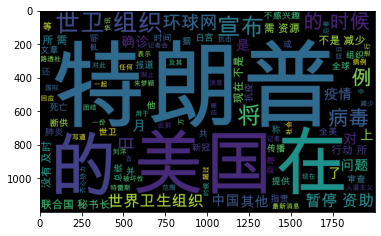

In [22]:
create_word_cloud(text)
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('wordcloud.jpg')
plt.imshow(img)
plt.show()